In [1]:
import pandas as pd
import numpy as np
import time
from langdetect import *
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
DetectorFactory.seed = 0

In [65]:
nama='wellspaces.co'
data = pd.read_excel('D:\\Apiary/'+nama+'igpost.xlsx')

In [66]:
data

,accessibility_caption,browser_push_pub_key,bundle_variant,caption,caption_is_edited,commenting_disabled_for_viewer,comments,comments_disabled,country_code,csrf_token,...,video_url,video_view_count,viewer,viewer_can_reshare,viewer_has_liked,viewer_has_saved,viewer_has_saved_to_collection,viewer_id,viewer_in_photo_of_you,width
0,Photo by Wellspaces.co in wellspaces.co Group....,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,"Selamat kepada fabelio, startup yang bergerak ...",1,0,0,0,ID,iwvX6NeqbA6ilg3R82g7D8JHZOdNczlr,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
1,"Photo by Wellspaces.co on April 07, 2020. Imag...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Does Work From Home sound new to you? \nDon't ...,1,0,1,0,ID,CzsWEbiYbSaPFptyGDJP6nWlz13QF7TV,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
2,"Photo shared by Wellspaces.co on March 10, 202...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,"We have 5 Forbes 30 under 30 entrepreneurs, pr...",1,0,0,0,ID,hrZWoEgKjYWcaKcLYliuleeBAmdrGKiK,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
3,"Photo shared by Wellspaces.co on February 18, ...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,It's sad to see one of our most humble and nic...,0,0,0,0,ID,uhO7kRyY6RDHDE42KRxXqGiNlH9UB1hw,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
4,Photo by Wellspaces.co in wellspaces.co Group....,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Another one from our community!\n\n@akseleran_...,0,0,0,0,ID,RFq50zxBNgKl5xtcmxY57KfTM4Opnpa1,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,Photo by Wellspaces.co in Freeware Spaces. Ima...,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,@mrmaskoolin working out at one of our private...,0,0,0,0,ID,fJHmpbHqnWMfiu0ipduGZH7VAxRFLfMm,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
588,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Fabelio Lounge Part 2 @fabelio,0,0,0,0,ID,IdB8qVYzc8PwnrfenkzmozDAuIv6aGDD,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
589,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Fabelio Lounge Part 1 @fabelio,1,0,0,0,ID,9PeEiiNhf7tDhBcctaajEb1zPhxkN735,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
590,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Shared Open Space Desks,0,0,0,0,ID,mXBv8kQ8whRSeY6onYIDlTSGsJBhz6gU,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080


In [67]:
print(len(data['caption']))
data.dropna(subset=['caption'], inplace=True)
data = data.reset_index(drop=True)
print(len(data['caption']))

592
592


In [68]:
print(len(data['caption']))
data = data.drop_duplicates(subset=['upload_date'])
data = data.reset_index(drop=True)
print(len(data['caption']))

592
592


In [69]:
data

,accessibility_caption,browser_push_pub_key,bundle_variant,caption,caption_is_edited,commenting_disabled_for_viewer,comments,comments_disabled,country_code,csrf_token,...,video_url,video_view_count,viewer,viewer_can_reshare,viewer_has_liked,viewer_has_saved,viewer_has_saved_to_collection,viewer_id,viewer_in_photo_of_you,width
0,Photo by Wellspaces.co in wellspaces.co Group....,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,"Selamat kepada fabelio, startup yang bergerak ...",1,0,0,0,ID,iwvX6NeqbA6ilg3R82g7D8JHZOdNczlr,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
1,"Photo by Wellspaces.co on April 07, 2020. Imag...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Does Work From Home sound new to you? \nDon't ...,1,0,1,0,ID,CzsWEbiYbSaPFptyGDJP6nWlz13QF7TV,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
2,"Photo shared by Wellspaces.co on March 10, 202...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,"We have 5 Forbes 30 under 30 entrepreneurs, pr...",1,0,0,0,ID,hrZWoEgKjYWcaKcLYliuleeBAmdrGKiK,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
3,"Photo shared by Wellspaces.co on February 18, ...",BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,It's sad to see one of our most humble and nic...,0,0,0,0,ID,uhO7kRyY6RDHDE42KRxXqGiNlH9UB1hw,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
4,Photo by Wellspaces.co in wellspaces.co Group....,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Another one from our community!\n\n@akseleran_...,0,0,0,0,ID,RFq50zxBNgKl5xtcmxY57KfTM4Opnpa1,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,Photo by Wellspaces.co in Freeware Spaces. Ima...,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,@mrmaskoolin working out at one of our private...,0,0,0,0,ID,fJHmpbHqnWMfiu0ipduGZH7VAxRFLfMm,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
588,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Fabelio Lounge Part 2 @fabelio,0,0,0,0,ID,IdB8qVYzc8PwnrfenkzmozDAuIv6aGDD,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
589,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Fabelio Lounge Part 1 @fabelio,1,0,0,0,ID,9PeEiiNhf7tDhBcctaajEb1zPhxkN735,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080
590,Photo by Wellspaces.co in Freeware Spaces.,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,es6,Shared Open Space Desks,0,0,0,0,ID,mXBv8kQ8whRSeY6onYIDlTSGsJBhz6gU,...,NaN,NaN,NaN,1,0,0,0,NaN,0,1080


In [70]:
data = data[['caption', 'likes', 'comments']]

In [71]:
test_string=data['caption'][0].split(' ')
test_string

['Selamat',
 'kepada',
 'fabelio,',
 'startup',
 'yang',
 'bergerak',
 'di',
 'bidang',
 'furnitur',
 'dan',
 'desain',
 'interior',
 'atas',
 'pendanaan',
 'seri',
 'C',
 'sebesar',
 'US$',
 '9',
 'Juta.',
 '\u2063\u2063\u2063\u2063\u2063Co-founder',
 '@csutardi\nMerupakan',
 'salah',
 'satu',
 'alumni',
 'keb\u2063\u2063\u2063\u2063anggaan',
 'kami',
 'dan',
 'juga',
 'mentor',
 '@wellshared.co\n\nKami',
 'nantikan',
 'pencapaian',
 'Fabelio',
 'berikutnya!\u2063\u2063\u2063\n\u2063\u2063\u2063\n#fabelio',
 '#wellspaces',
 '',
 '#worklearnnetwork']

In [72]:
for i in range(len(data['caption'])):
    test_string=data['caption'][i].split(' ')
    data['caption'][i]=''
    print(i)
    for j in range(len(test_string)):
        if '#' not in test_string[j]:
            data['caption'][i]+=test_string[j]+' '

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
print(len(data['caption']))
data.dropna(subset=['caption'], inplace=True)
data = data.reset_index(drop=True)
print(len(data['caption']))

592
592


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
data['engagement']=data['likes']+data['comments']
data['language']=''
data

,caption,likes,comments,engagement,language
0,"Selamat kepada fabelio, startup yang bergerak ...",13,0,13,
1,Does Work From Home sound new to you? \nDon't ...,18,1,19,
2,"We have 5 Forbes 30 under 30 entrepreneurs, pr...",64,0,64,
3,It's sad to see one of our most humble and nic...,111,0,111,
4,Another one from our community!\n\n@akseleran_...,23,0,23,
...,...,...,...,...,...
587,@mrmaskoolin working out at one of our private...,3,0,3,
588,Fabelio Lounge Part 2 @fabelio,3,0,3,
589,Fabelio Lounge Part 1 @fabelio,3,0,3,
590,Shared Open Space Desks,1,0,1,


In [75]:
tot=0
for i in range(len(data['caption'])):
    try:
        det1 = detect(data['caption'][i]) 
        det2 = detect_langs(data['caption'][i])
    except:
        print(i, "error")
        data = data.drop([i])
        pass
    if det1=='id':
        data['language'][i]='id'
    else:
        for item in det2:
            if item.lang == "id" and item.prob>=0.15:
                data['language'][i]='id'
            elif item.lang == "en" and item.prob>=0.85:
                data['language'][i]='en'
            else:
                data['language'][i]='en'
    for item in det2:
        if item.prob<=0.5:
            tot+=1
            print(i, item.lang,item.prob)
data = data.reset_index(drop=True)
print(tot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


27 nl 0.14285851638922956
35 tl 0.14285788110698983


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


99 id 0.2857134290551658
100 id 0.28571412839185517
114 tl 0.14285631482328548
184 id 0.28571568788359875
243 es 0.15939459268369743
243 nl 0.1428565077015646
244 en 0.2857180347875575
244 fr 0.142856738794729
276 sv 0.428571441194061
294 ro 0.14285967815946496
329 af 0.4285716778304132
332 en 0.28571449087651457
332 et 0.14285755476587925
368 id 0.14285708378183926
369 en 0.2857121640123963
371 id 0.1428590369358239
399 id 0.28571392425782166
400 af 0.14285728959958224
407 id 0.2857174487607168
437 cy 0.14285775707478002
437 en 0.1428571012597508
446 ca 0.4285724250551609
473 en 0.42857231231778137
473 tl 0.2857138049185146
473 id 0.285713230968059
476 id 0.14285984089800377
494 en 0.42857228812430237
528 da 0.14285927345469815
528 en 0.1428574835173756
538 en 0.28571567602934556
540 id 0.1428579851003294
541 no 0.28571448993859566
556 nl 0.1428618624863475
563 fi 0.14285706765827388
563 hr 0.14285678915900613
564 en 0.1428569365852878
564 ro 0.1427398911468268
566 id 0.42857205233069

In [76]:
data['language'].value_counts(dropna=False)

en    565
id     27
Name: language, dtype: int64

In [1941]:
nom=182
print(detect(data['caption'][nom]))
print(detect_langs(data['caption'][nom]))
print(data['caption'][nom])
print(data['language'][nom])

en
[en:0.7142841071617745, id:0.28571568788359875]
The opening of our new location, Freeware Suites Intermark BSD at @bsdcity, is coming near.

Contact us directly to get your special rate for our office suites starting from IDR 6 Millions net per month (capacity from 4 to 12 persons)! This deal is valid during the month of October only.

Swipe on the photos to see this new workspaces with cool design located in the town that is set to be the future Silicon Valley of Southeast Asia!
________________________________

Pembukaan cabang kami yang baru, Freeware Suites Intermak BSD di @bsdcity, sudah di depan mata.

Hubungi segera untuk mendapatkan harga spesial mulai dari 6 Juta Rupiah net per bulan (kapasitas dari 4 hingga 12 orang)! Penawaran ini berlaku selama bulan Oktober saja.

Geser foto diatas untuk melihat kantor dan ruang kerja terbaru kami ini dengan desain yang modern dan kekinian dan berlokasi di kota mandiri yang dicanangkan sebagai Silicon Valley dari Asia Tenggara di masa 


In [1888]:
nom=826
print(detect(data['caption'][nom]))
print(detect_langs(data['caption'][nom]))
print(data['caption'][nom])
print(data['language'][nom])

af
[af:0.5714263122584382, en:0.42857334805129665]
Team work makes dream work
.
.
 
en


In [1846]:
nom=46
print(detect(data['caption'][nom]))
print(detect_langs(data['caption'][nom]))
print(data['caption'][nom])
print(data['language'][nom])

en
[en:0.8571414074447479, id:0.14285765023253102]
Who’s planning to go out this Friday? Make sure to wrap up today’s shenanigans with a bang!
.
Location:
Conclave Arteri
Jl. Sultan Iskandar Muda No.17 B, Kebayoran Lama Selatan, Jakarta Selatan 12240

Venue direction link: 
en


In [77]:
detect_langs(data['caption'][9])

[en:0.9999981960810125]

In [78]:
res = detect_langs(data['caption'][9])

In [79]:
for item in res:
    if item.lang == "id" or item.lang == "en":
        print(item.lang)

en


In [80]:
item.__dict__.keys()

dict_keys(['lang', 'prob'])

In [81]:
data.to_excel('D:/Apiary/'+nama+'languageig.xlsx', index=False)

In [207]:
nama='wellspaces.co'
data = pd.read_excel('D:\\Apiary/'+nama+'languageig.xlsx')
data

,caption,likes,comments,engagement,language
0,"Selamat kepada fabelio, startup yang bergerak ...",13,0,13,id
1,Does Work From Home sound new to you? \nDon't ...,18,1,19,en
2,"We have 5 Forbes 30 under 30 entrepreneurs, pr...",64,0,64,en
3,It's sad to see one of our most humble and nic...,111,0,111,en
4,Another one from our community!\n\n@akseleran_...,23,0,23,en
...,...,...,...,...,...
587,@mrmaskoolin working out at one of our private...,3,0,3,en
588,Fabelio Lounge Part 2 @fabelio,3,0,3,en
589,Fabelio Lounge Part 1 @fabelio,3,0,3,en
590,Shared Open Space Desks,1,0,1,en


In [208]:
data['language'].value_counts(dropna=False)

en    565
id     27
Name: language, dtype: int64

In [209]:
data['engagement'].std()

432.1131223850296

<AxesSubplot:>

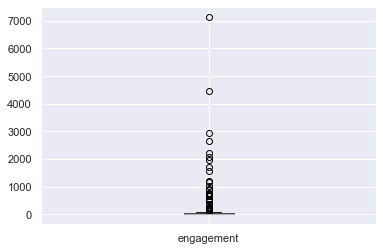

In [210]:
data.boxplot(column=['engagement'])

In [211]:
z_scores = stats.zscore(data['engagement'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
filtered_entries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [212]:
len(filtered_entries)

592

In [213]:
for i in range(len(filtered_entries)):
    if not filtered_entries[i]:
        print(data['engagement'][i])
        data = data.drop([i])
data = data.reset_index(drop=True)
len(data['engagement'])

2643
1167
2959
7150
4453
1031
2215
1587
1715
2061
1191
1960


580

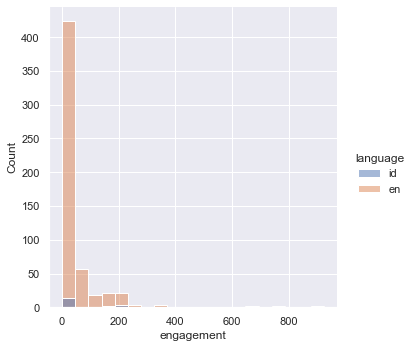

In [214]:
sns.displot(data, x="engagement", bins=20, hue="language")

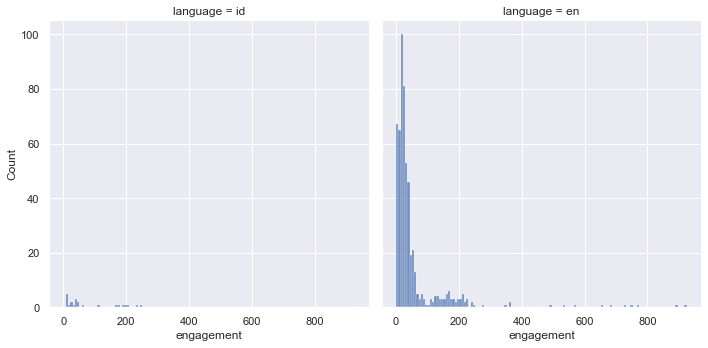

In [215]:
sns.displot(data, x="engagement", col="language", multiple="dodge")

C:\Users\Muamkh\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Muamkh\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Muamkh\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(m

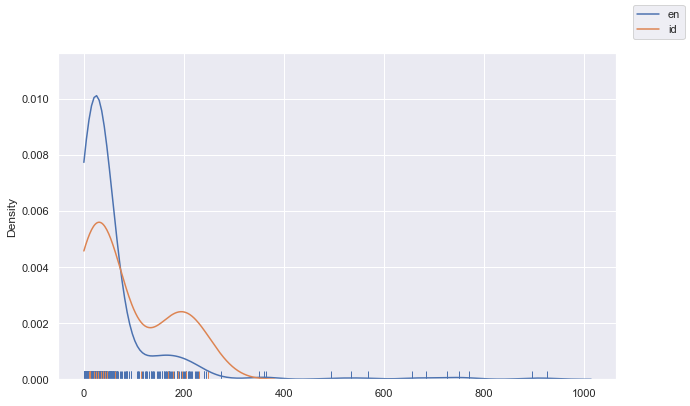

In [216]:
sns.set_theme()
fig = plt.figure(figsize=(10,6))

target_0 = data.loc[data['language'] == 'en']
target_1 = data.loc[data['language'] == 'id']

sns.distplot(target_0[['engagement']], hist=False, rug=True, kde_kws={'clip': (0.0, 100000.0)})
sns.distplot(target_1[['engagement']], hist=False, rug=True, kde_kws={'clip': (0.0, 100000.0)})
fig.legend(labels=['en','id'])

In [217]:
data

,caption,likes,comments,engagement,language
0,"Selamat kepada fabelio, startup yang bergerak ...",13,0,13,id
1,Does Work From Home sound new to you? \nDon't ...,18,1,19,en
2,"We have 5 Forbes 30 under 30 entrepreneurs, pr...",64,0,64,en
3,It's sad to see one of our most humble and nic...,111,0,111,en
4,Another one from our community!\n\n@akseleran_...,23,0,23,en
...,...,...,...,...,...
575,@mrmaskoolin working out at one of our private...,3,0,3,en
576,Fabelio Lounge Part 2 @fabelio,3,0,3,en
577,Fabelio Lounge Part 1 @fabelio,3,0,3,en
578,Shared Open Space Desks,1,0,1,en


In [218]:
data['language'].value_counts(dropna=False)

en    557
id     23
Name: language, dtype: int64

In [219]:
data['engagement'].mean()

58.0551724137931

In [220]:
data['engagement'].groupby(data['language']).mean()

language
en    56.908438
id    85.826087
Name: engagement, dtype: float64